In [1]:
# Importer les bibliothèques pour l'analyse des données
import pandas as pd  # Manipulation de données tabulaires
import numpy as np   # Calculs mathématiques et manipulation de matrices

# Importer les bibliothèques pour la visualisation
import matplotlib.pyplot as plt  # Graphiques et visualisations
import seaborn as sns  # Graphiques améliorés
import matplotlib  # Nécessaire pour obtenir la version

# Importer les bibliothèques pour le machine learning
from sklearn.model_selection import train_test_split  # Division des données en ensembles d'entraînement/test
from sklearn.preprocessing import StandardScaler  # Normalisation des données
from sklearn.ensemble import RandomForestClassifier  # Exemple : classificateur basé sur les forêts aléatoires
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Évaluation des modèles

# Importer les avertissements pour ignorer les messages inutiles
import warnings
warnings.filterwarnings('ignore')

# Vérification des versions des bibliothèques (optionnel)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


Pandas version: 2.2.3
Numpy version: 1.26.4
Matplotlib version: 3.9.3
Seaborn version: 0.13.2


In [2]:
df_players = pd.read_csv('data/Statistic on best rugby players 2023-2024.csv', encoding='latin1')


In [3]:
df_players.dtypes

racking                      int64
First-name                  object
Name                        object
Nationality                 object
Position                    object
age                          int64
tall(m)                    float64
weight                       int64
start_career               float64
club                        object
Tournament                  object
club-match                 float64
club_W                     float64
club_D                     float64
club_L                     float64
club_starter               float64
club_try                   float64
club_points                float64
club_Min                   float64
other club tournament       object
other-match                float64
other_W                    float64
other_D                    float64
other_L                    float64
other_starter              float64
other_try                  float64
other_points               float64
other_Min                  float64
National_match      

In [4]:
df_players.isnull().sum()

racking                     0
First-name                  0
Name                        0
Nationality                 0
Position                    0
age                         0
tall(m)                     0
weight                      0
start_career                1
club                        0
Tournament                  4
club-match                  1
club_W                      1
club_D                      1
club_L                      1
club_starter                2
club_try                    1
club_points                 1
club_Min                    2
other club tournament      18
other-match                 2
other_W                     2
other_D                     2
other_L                     2
other_starter               2
other_try                   2
other_points                2
other_Min                   2
National_match              0
National_W                  0
National_D                  0
National_L                  0
National_starter            0
National_t

In [5]:
df_players.describe()

,racking,age,tall(m),weight,start_career,club-match,club_W,club_D,club_L,club_starter,...,National_match,National_W,National_D,National_L,National_starter,National_try,National_Points,National_min,yellow card,red card
count,99.000000,99.000000,99.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,97.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,28.373737,3.798788,104.595960,2014.428571,10.612245,6.581633,0.102041,3.683673,8.989691,...,9.919192,6.767677,0.121212,3.101010,7.828283,2.232323,17.303030,591.181818,0.656566,0.070707
std,28.722813,3.415409,19.209609,14.899609,3.882289,5.387333,3.451948,0.304258,2.418131,4.442913,...,3.240927,2.743558,0.328035,1.809809,3.628235,2.363965,22.506894,254.867567,0.822659,0.257639
min,1.000000,21.000000,1.710000,76.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,25.500000,26.000000,1.820000,94.000000,2013.000000,7.000000,4.000000,0.000000,2.000000,6.000000,...,8.000000,5.000000,0.000000,2.000000,6.000000,1.000000,5.000000,400.000000,0.000000,0.000000
50%,50.000000,28.000000,1.860000,103.000000,2015.000000,12.000000,7.000000,0.000000,3.000000,10.000000,...,10.000000,8.000000,0.000000,3.000000,8.000000,1.000000,10.000000,590.000000,0.000000,0.000000
75%,74.500000,31.000000,1.910000,114.000000,2017.000000,14.000000,9.000000,0.000000,5.000000,12.000000,...,12.000000,9.000000,0.000000,4.000000,11.000000,3.000000,20.000000,775.000000,1.000000,0.000000
max,99.000000,35.000000,193.000000,151.000000,2022.000000,35.000000,13.000000,1.000000,10.000000,17.000000,...,18.000000,12.000000,1.000000,9.000000,17.000000,11.000000,122.000000,1374.000000,3.000000,1.000000


In [6]:
print(df_players.duplicated().sum())  # Nombre de lignes dupliquées


0


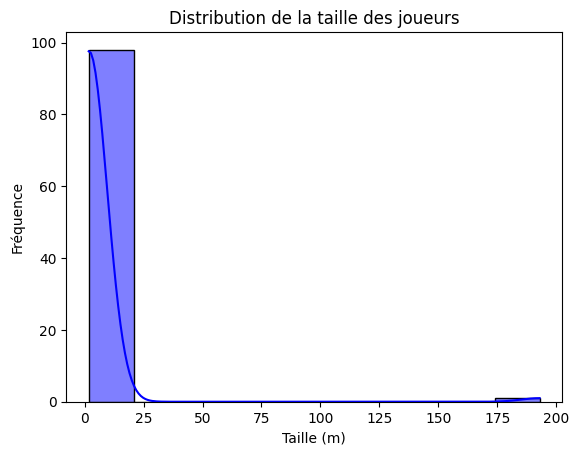

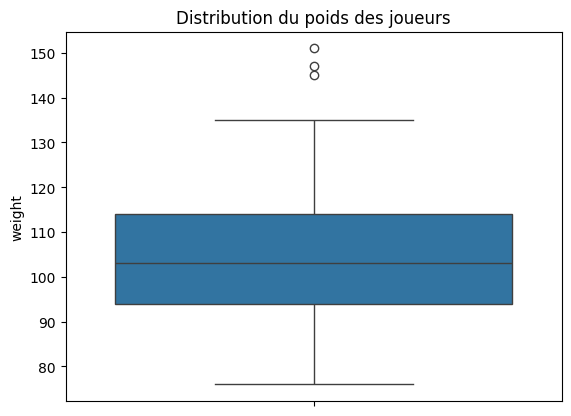

In [7]:
sns.histplot(df_players['tall(m)'], kde=True, bins=10, color='blue')
plt.title('Distribution de la taille des joueurs')
plt.xlabel('Taille (m)')
plt.ylabel('Fréquence')
plt.show()

sns.boxplot(df_players['weight'])
plt.title('Distribution du poids des joueurs')
plt.show()


In [8]:
df_players.head(
    
)

,racking,First-name,Name,Nationality,Position,age,tall(m),weight,start_career,club,...,National_match,National_W,National_D,National_L,National_starter,National_try,National_Points,National_min,yellow card,red card
0,1,Antoine,Dupont,France,Scrumhalf,27,1.74,86,2000.0,Toulouse,...,2,2,0,0,2,0,0,127,0,0
1,2,Ardie,Savea,New Zealand,Backrow,30,1.90,103,2013.0,Wellington Hurricanes,...,13,9,0,4,13,6,30,918,1,0
2,3,Pieter-Steph,Du Toit,South Africa,Backrow,32,2.00,116,2013.0,Toyota Verblitz,...,12,10,0,2,12,3,15,856,1,0
3,4,Caelen,Doris,Ireland,Backrow,26,193.00,106,2017.0,Leinster,...,15,12,0,2,12,3,15,1069,1,0
4,5,Eben,Etzebeth,South Africa,Secondrow,32,2.03,126,2013.0,sharks,...,12,10,0,2,11,1,5,603,2,0


In [9]:
# Vérifier les valeurs uniques pour confirmation
print(df_players['tall(m)'].unique())

# Appliquer la conversion : si la valeur est < 3, elle est en mètres et doit être multipliée par 100
df_players['tall(m)'] = df_players['tall(m)'].apply(lambda x: x * 100 if x < 3 else x)

# Renommer la colonne pour refléter l'unité correcte
df_players.rename(columns={'tall(m)': 'tall(cm)'}, inplace=True)

# Vérifier la conversion
print(df_players[['tall(cm)']].head())


[  1.74   1.9    2.   193.     2.03   1.91   1.88   1.71   1.85   1.89
   1.98   1.84   1.75   1.86   1.82   1.78   1.96   1.76   1.83   2.07
   1.97   2.01   1.93   1.87   1.77   1.8    1.95   1.94   1.73   1.79
   1.99   1.81]
   tall(cm)
0     174.0
1     190.0
2     200.0
3     193.0
4     203.0


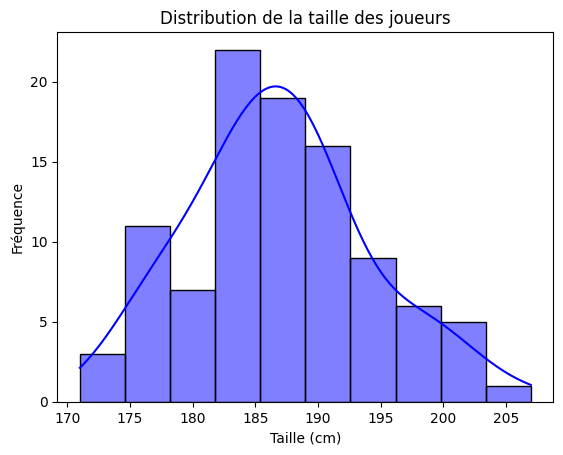

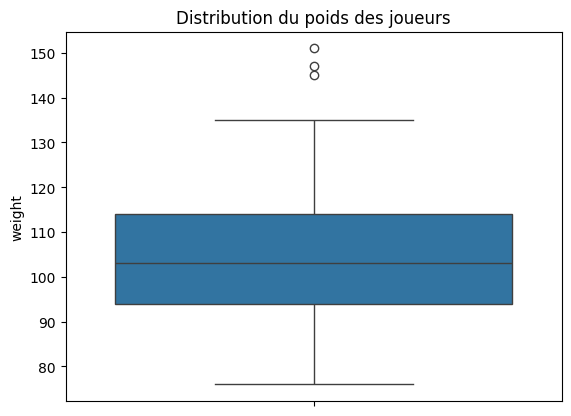

In [10]:
sns.histplot(df_players['tall(cm)'], kde=True, bins=10, color='blue')
plt.title('Distribution de la taille des joueurs')
plt.xlabel('Taille (cm)')
plt.ylabel('Fréquence')
plt.show()

sns.boxplot(df_players['weight'])
plt.title('Distribution du poids des joueurs')
plt.show()

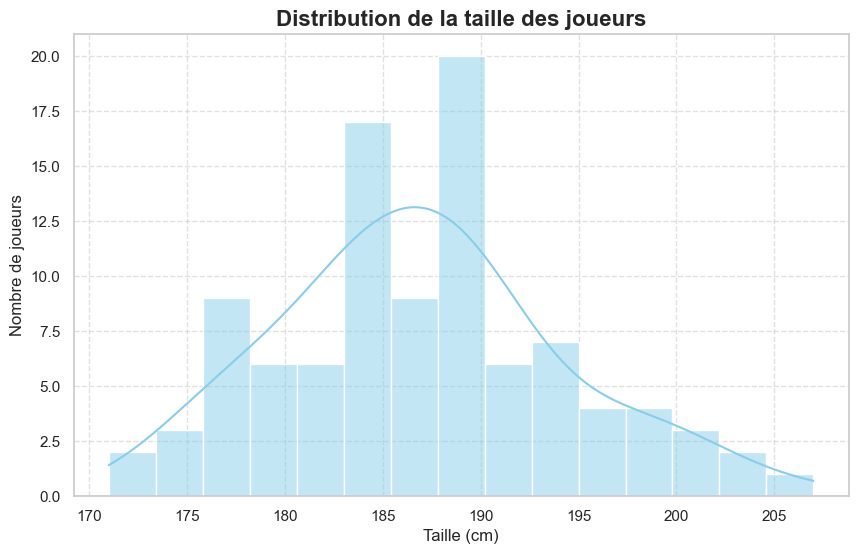

In [11]:
# Amélioration du graphique avec sns.histplot
sns.set(style="whitegrid")  # Applique un style de fond plus élégant
plt.figure(figsize=(10, 6))  # Agrandit la taille du graphique

# Histogramme avec le nombre de joueurs au lieu de la fréquence
sns.histplot(df_players['tall(cm)'], kde=True, bins=15, color='skyblue', stat='count')

# Ajouter un titre et des labels
plt.title('Distribution de la taille des joueurs', fontsize=16, fontweight='bold')
plt.xlabel('Taille (cm)', fontsize=12)
plt.ylabel('Nombre de joueurs', fontsize=12)

# Ajouter des annotations ou des ajustements pour rendre plus esthétique
plt.grid(True, linestyle='--', alpha=0.6)

# Affichage du graphique
plt.show()


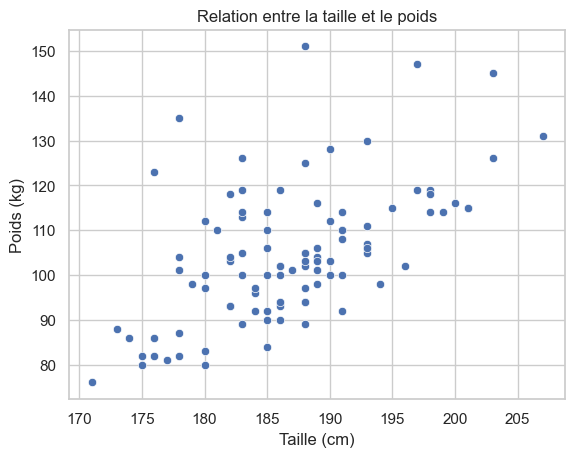

In [12]:
sns.scatterplot(x='tall(cm)', y='weight', data=df_players)
plt.title('Relation entre la taille et le poids')
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.show()


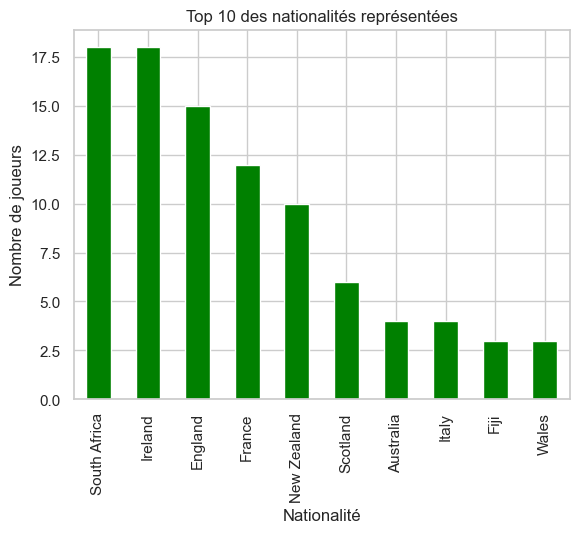

In [13]:
top_nationalities = df_players['Nationality'].value_counts().head(10)
top_nationalities.plot(kind='bar', color='green')
plt.title('Top 10 des nationalités représentées')
plt.xlabel('Nationalité')
plt.ylabel('Nombre de joueurs')
plt.show()


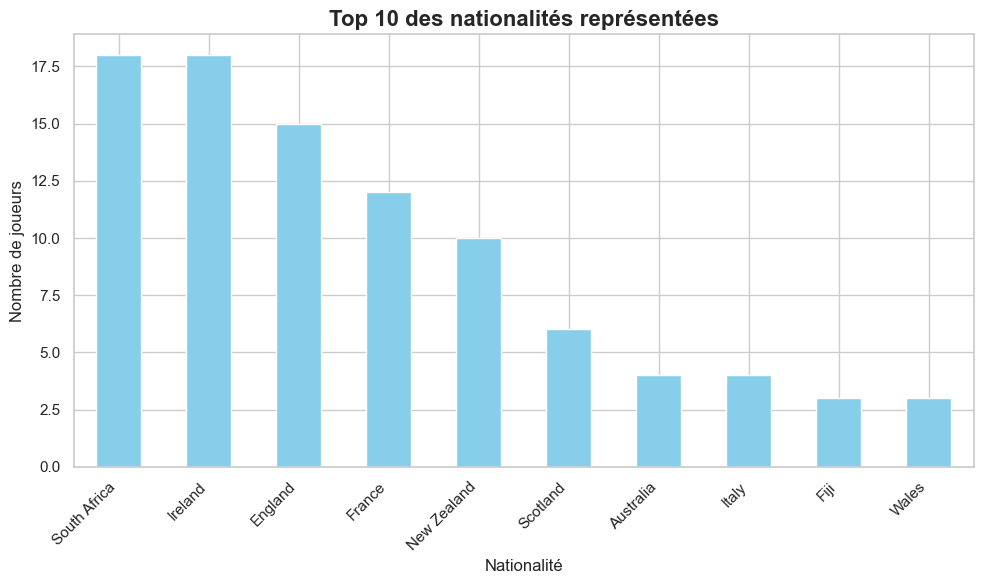

In [14]:
# Top 10 des nationalités représentées
top_nationalities = df_players['Nationality'].value_counts().head(10)

# Créer le graphique en barre avec une couleur plus pâle
top_nationalities.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Ajouter un titre et des labels
plt.title('Top 10 des nationalités représentées', fontsize=16, fontweight='bold')
plt.xlabel('Nationalité', fontsize=12)
plt.ylabel('Nombre de joueurs', fontsize=12)

# Incliner les labels de l'axe x à 45°
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.tight_layout()  # Assure que le titre et les labels sont bien affichés
plt.show()


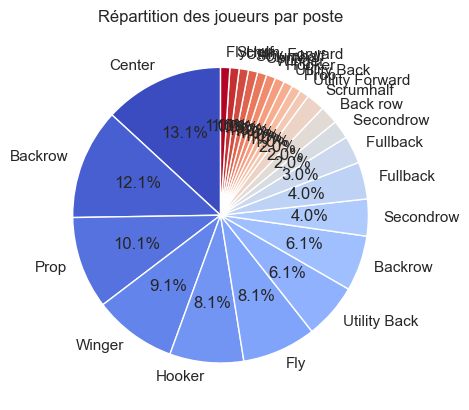

In [15]:
df_players['Position'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Répartition des joueurs par poste')
plt.ylabel('')
plt.show()


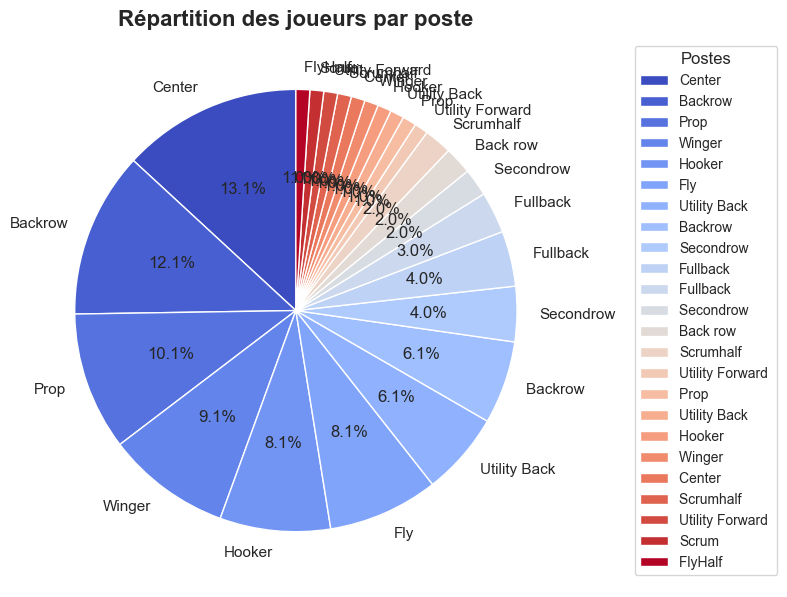

In [16]:
# Graphique en secteur pour la répartition des joueurs par poste
df_players['Position'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))

# Ajouter un titre
plt.title('Répartition des joueurs par poste', fontsize=16, fontweight='bold')

# Supprimer l'étiquette 'y' (axe des ordonnées)
plt.ylabel('')

# Ajouter une légende à droite avec une taille de police plus lisible
plt.legend(title='Postes', bbox_to_anchor=(1.1, 0.5), loc='center left', fontsize=10)

# Affichage du graphique
plt.tight_layout()  # Ajuste l'espace pour éviter que les éléments se chevauchent
plt.show()


In [17]:
# Dictionnaire pour mapper les positions en "avant" et "arrière"
position_classification = {
    'Pilier': 'Avant', 
    'Deuxième ligne': 'Avant',
    'Troisième ligne': 'Avant',
    'Demi-de-mêlée': 'Arrière',
    'Demi-d\'ouverture': 'Arrière',
    'Ailier': 'Arrière',
    'Arrière': 'Arrière'
    # Ajouter d'autres positions si nécessaire
}

# Appliquer la classification à la colonne 'Position'
df_players['Position_class'] = df_players['Position'].map(position_classification)

# Afficher les premières lignes pour vérifier
print(df_players[['Position', 'Position_class']].head())


    Position Position_class
0  Scrumhalf            NaN
1    Backrow            NaN
2    Backrow            NaN
3    Backrow            NaN
4  Secondrow            NaN


In [18]:
df_players['Position'].value_counts()

Position
Center              13
Backrow             12
Prop                10
Winger               9
Hooker               8
Fly                  8
Utility Back         6
Backrow              6
Secondrow            4
Fullback             4
Fullback             3
Secondrow            2
Back row             2
Scrumhalf            2
Utility Forward      1
Prop                 1
Utility Back         1
Hooker               1
Winger               1
Center               1
Scrumhalf            1
Utility Forward      1
Scrum                1
FlyHalf              1
Name: count, dtype: int64

In [33]:
# Dictionnaire pour mapper les positions en "avant" et "arrière"
position_classification = {
    'Prop': 'Avant', 
    'Hooker': 'Avant', 
    'Secondrow': 'Avant',
    'Backrow': 'Avant', 
    'Scrum': 'Avant', 
    'Utility Forward': 'Avant',  # Utilisé comme un avant pour ce contexte
    'Fly': 'Arrière', 
    'FlyHalf': 'Arrière', 
    'Center': 'Arrière', 
    'Winger': 'Arrière', 
    'Fullback': 'Arrière', 
    'Scrumhalf': 'Arrière',
    'Scrum' : 'Arrière' ,
    'Utility Back': 'Arrière',  # Utilisé comme un arrière pour ce contexte
    'Back row': 'Avant',  # Comme "Backrow" mais avec un autre format de nom
}
# Enlever les espaces supplémentaires au début et à la fin
df_players['Position'] = df_players['Position'].str.strip()

# Appliquer la classification à la colonne 'Position'
df_players['Position_class'] = df_players['Position'].map(position_classification)

# Afficher les premières lignes pour vérifier
print(df_players[['Position', 'Position_class']].head())


    Position Position_class
0  Scrumhalf        Arrière
1    Backrow          Avant
2    Backrow          Avant
3    Backrow          Avant
4  Secondrow          Avant


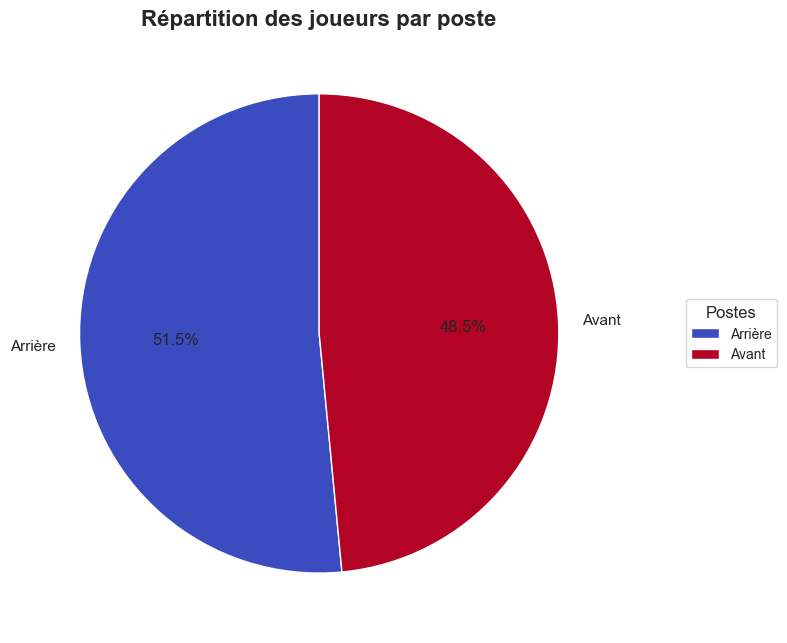

In [34]:
# Graphique en secteur pour la répartition des joueurs par poste
df_players['Position_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))

# Ajouter un titre
plt.title('Répartition des joueurs par poste', fontsize=16, fontweight='bold')

# Supprimer l'étiquette 'y' (axe des ordonnées)
plt.ylabel('')

# Ajouter une légende à droite avec une taille de police plus lisible
plt.legend(title='Postes', bbox_to_anchor=(1.1, 0.5), loc='center left', fontsize=10)

# Affichage du graphique
plt.tight_layout()  # Ajuste l'espace pour éviter que les éléments se chevauchent
plt.show()

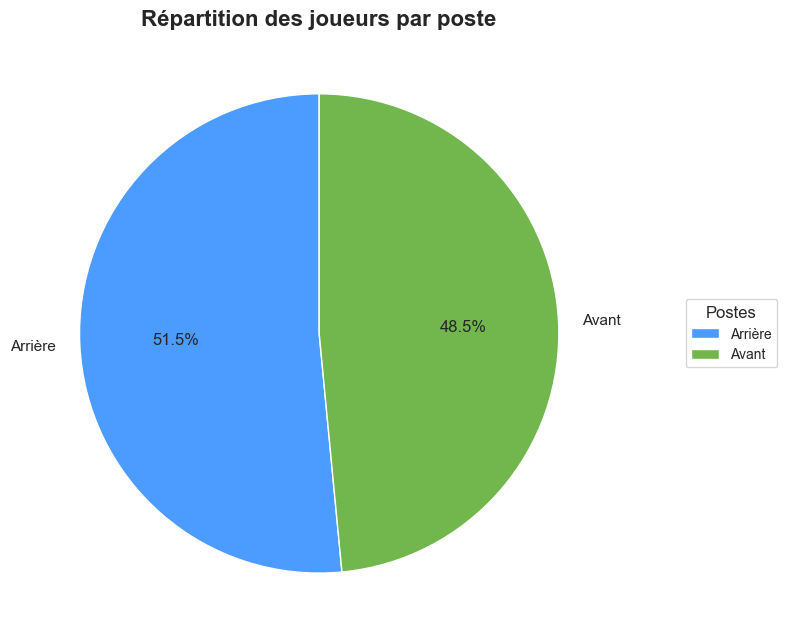

In [35]:
# Graphique en secteur pour la répartition des joueurs par poste
df_players['Position_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                                                 colors=['#4C9BFF', '#72B74E'], figsize=(8, 8))  # Bleu et Vert

# Ajouter un titre
plt.title('Répartition des joueurs par poste', fontsize=16, fontweight='bold')

# Supprimer l'étiquette 'y' (axe des ordonnées)
plt.ylabel('')

# Ajouter une légende à droite avec une taille de police plus lisible
plt.legend(title='Postes', bbox_to_anchor=(1.1, 0.5), loc='center left', fontsize=10)

# Affichage du graphique
plt.tight_layout()  # Ajuste l'espace pour éviter que les éléments se chevauchent
plt.show()


In [22]:
# Sélection des colonnes pertinentes
correlation_table = df_players[['racking', 'yellow card', 'red card']]

# Tri par classement (racking)
correlation_table = correlation_table.sort_values(by='racking')

# Afficher les premières lignes du tableau
print(correlation_table.head(10))  # Limité à 10 lignes pour un aperçu


   racking  yellow card  red card
0        1            0         0
1        2            1         0
2        3            1         0
3        4            1         0
4        5            2         0
5        6            0         0
6        7            0         0
7        8            1         0
8        9            1         0
9       10            1         0


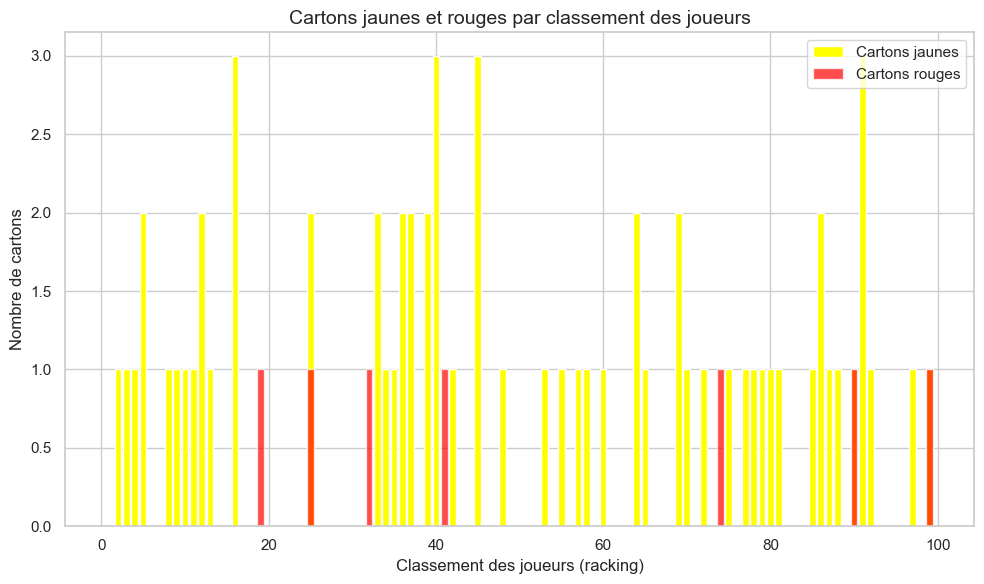

In [23]:
# Graphique combiné pour visualiser les cartons jaunes et rouges en fonction du classement
plt.figure(figsize=(10, 6))
plt.bar(correlation_table['racking'], correlation_table['yellow card'], color='yellow', label='Cartons jaunes')
plt.bar(correlation_table['racking'], correlation_table['red card'], color='red', label='Cartons rouges', alpha=0.7)

# Ajouter des titres et légendes
plt.title('Cartons jaunes et rouges par classement des joueurs', fontsize=14)
plt.xlabel('Classement des joueurs (racking)', fontsize=12)
plt.ylabel('Nombre de cartons', fontsize=12)
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


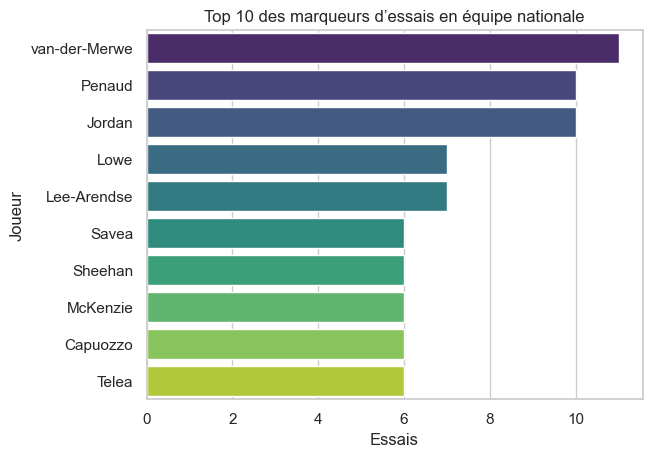

In [24]:
top_scorers = df_players.nlargest(10, 'National_try')[['First-name', 'Name', 'National_try']]
sns.barplot(x='National_try', y='Name', data=top_scorers, palette='viridis')
plt.title('Top 10 des marqueurs d’essais en équipe nationale')
plt.xlabel('Essais')
plt.ylabel('Joueur')
plt.show()


In [26]:
position_classification.update({
    'Fullback': 'Back', 
    'Scrumhalf': 'Back',
    'Backrow': 'Forward', 
    'Secondrow': 'Forward', 
    'Hooker': 'Forward',
    'Winger': 'Back',
    'FlyHalf': 'Back',
    'Utility Forward': 'Forward',
    'Utility Back': 'Back'
})


In [36]:
# Trouver les lignes où la colonne 'Position_class' est nulle
missing_positions = df_players[df_players['Position_class'].isnull()]

# Afficher les lignes avec des valeurs manquantes pour 'Position_class'
print(missing_positions)


Empty DataFrame
Columns: [racking, First-name, Name, Nationality, Position, age, tall(cm), weight, start_career, club, Tournament, club-match, club_W, club_D, club_L, club_starter, club_try, club_points, club_Min, other club tournament  , other-match, other_W, other_D, other_L, other_starter, other_try, other_points, other_Min, National_match, National_W, National_D, National_L, National_starter, National_try, National_Points, National_min, yellow card, red card, Position_class]
Index: []

[0 rows x 39 columns]


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

     Arrière       0.82      0.90      0.86        10
       Avant       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



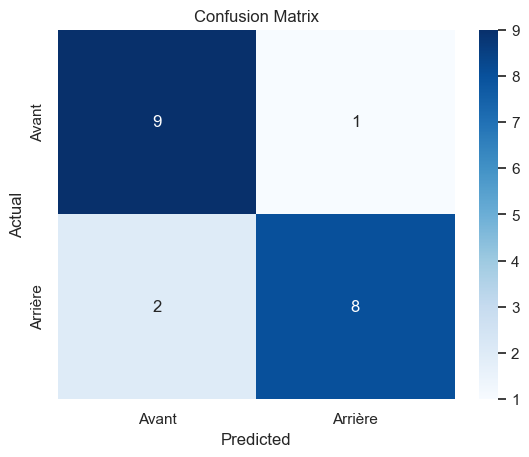

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_players is already loaded and preprocessed

# Select features and target
features = ['tall(cm)', 'weight', 'age', 'club_points', 'club_Min', 'National_Points']
target = 'Position_class'

# Split data into train and test sets
X = df_players[features]
y = df_players[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Avant', 'Arrière'], yticklabels=['Avant', 'Arrière'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


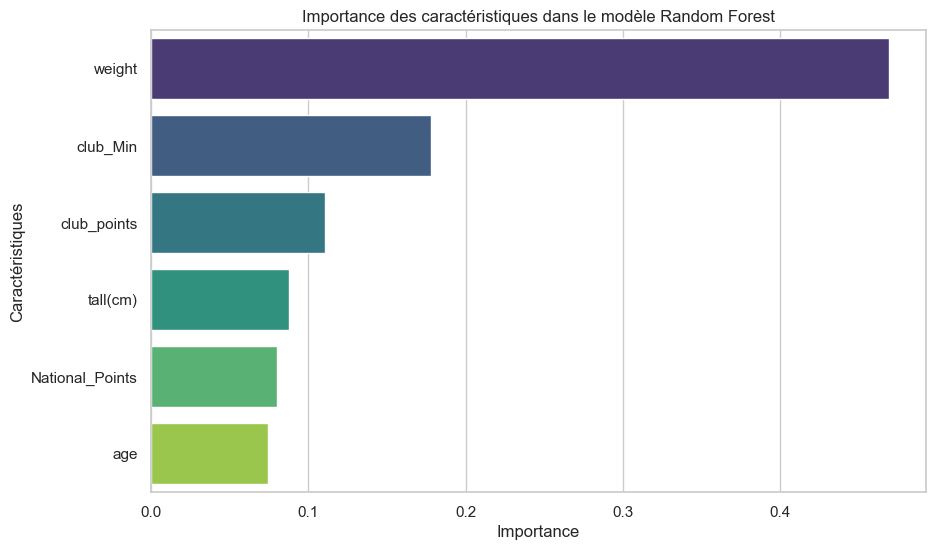

In [38]:
# Récupérer l'importance des caractéristiques
feature_importance = rf_model.feature_importances_

# Créer un DataFrame pour visualiser les caractéristiques et leur importance
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Trier les caractéristiques par ordre d'importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Importance des caractéristiques dans le modèle Random Forest')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()
